In [1]:
#importing the packages Pandas and numpy,matplotlib,seaborn,sklearn
import pandas as pd
import numpy as np
from numpy import unique
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
import matplotlib as mt
from matplotlib import style
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 300) # or 1000.
pd. set_option('display.max_rows', 300) # or 1000.



# 1.DATA PREPROCESSING

In [2]:
df=pd.read_csv('Data.csv')

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,2020-01-13 00:00:00,2020.0,1.930338e+09,2020-01-01,20191231,20200101,20200116.0,USD,RV,1.0,NaN,2783.94,20200101.0,NAH4,1.930338e+09,0
1,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930598e+09,2020-03-04,20200304,20200304,20200319.0,USD,RV,1.0,NaN,57691.09,20200304.0,NAH4,1.930598e+09,1
2,U001,0100001222,REST trust,2019-09-24 00:00:00,2019.0,1.929834e+09,2019-09-04,20190905,20190904,20190919.0,USD,RV,1.0,NaN,1029.46,20190904.0,NAA8,1.929834e+09,0
3,U001,0200696090,UNITE us,2019-01-22 00:00:00,2019.0,1.928567e+09,2019-01-03,20190104,20190103,20190118.0,USD,RV,1.0,NaN,7594.94,20190103.0,NAA8,1.928567e+09,0
4,U001,0200759878,SA in,2019-02-19 00:00:00,2019.0,1.928702e+09,2019-02-01,20190129,20190201,20190216.0,USD,RV,1.0,NaN,15617.35,20190201.0,NAH4,1.928702e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200769623,WAL-MAR us,2019-09-04 00:00:00,2019.0,1.929771e+09,2019-08-23,20190821,20190823,20190907.0,USD,RV,1.0,NaN,29477.48,20190823.0,NAH4,1.929771e+09,0
49996,U001,0200769623,WAL-MAR llc,2019-02-25 00:00:00,2019.0,1.928792e+09,2019-02-13,20190213,20190213,20190228.0,USD,RV,1.0,NaN,32068.88,20190213.0,NAH4,1.928792e+09,0
49997,U001,0200726979,BJ'S us,2020-03-11 00:00:00,2020.0,1.930562e+09,2020-02-25,20200224,20200225,20200311.0,USD,RV,1.0,NaN,67.29,20200225.0,NAA8,1.930562e+09,0
49998,U001,0200858049,GEOR systems,2019-01-31 00:00:00,2019.0,1.928626e+09,2019-01-15,20190115,20190115,20190130.0,USD,RV,1.0,NaN,20923.60,20190115.0,NAA8,1.928626e+09,0


In [4]:
df.shape #printing the shape

(50000, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
df.isnull().sum()  #calculating null

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
df.isnull().mean() #calcalating mean value of all null

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00006
isOpen                    0.00000
dtype: float64

## dropping all column null

In [8]:
df.dropna(how='all',axis=1,inplace=True)           #dropping all columns that has value null
df.shape                                      

(50000, 18)

In [9]:
df.isnull().sum() ##after null column removal

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [10]:
df.duplicated()        #getting duplicate

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996     True
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [11]:
df.loc[df.duplicated(),:] ## all duplicated data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1753,U001,0200726979,BJ'S co,2019-02-06 00:00:00,2019.0,1.928659e+09,2019-01-22,20190122,20190122,20190206.0,USD,RV,1.0,169.61,20190122.0,NAA8,1.928659e+09,0
1849,U001,0200759878,SA systems,2020-03-13 00:00:00,2020.0,1.930476e+09,2020-02-06,20200204,20200206,20200322.0,USD,RV,1.0,103057.32,20200206.0,NAWP,1.930476e+09,0
2303,U001,200707822,PUBLI systems,2019-02-11 00:00:00,2019.0,1.928689e+09,2019-01-25,20190126,20190125,20190209.0,USD,RV,1.0,78813.53,20190125.0,NAA8,1.928689e+09,0
3307,U001,0200759878,SA co,NaN,2020.0,1.930766e+09,2020-04-08,20200408,20200408,20200423.0,USD,RV,1.0,3121.51,20200408.0,NAH4,1.930766e+09,1
3934,U001,0200782669,SYGMA trust,2019-05-06 00:00:00,2019.0,1.929139e+09,2019-04-17,20190412,20190417,20190502.0,USD,RV,1.0,9958.55,20190417.0,NAA8,1.929139e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49914,U001,0200769623,WAL-MAR,2019-12-05 00:00:00,2019.0,1.930188e+09,2019-11-24,20191123,20191124,20191209.0,USD,RV,1.0,42322.78,20191124.0,NAH4,1.930188e+09,0
49936,U001,0200769623,WAL-MAR corp,2019-04-22 00:00:00,2019.0,1.929129e+09,2019-04-11,20190411,20190411,20190426.0,USD,RV,1.0,10999.39,20190411.0,NAH4,1.929129e+09,0
49958,CA02,0140105686,SYSC llc,2019-05-29 00:00:00,2019.0,2.960548e+09,2019-05-15,20190515,20190515,20190526.0,CAD,RV,1.0,31.65,20190516.0,CA10,2.960548e+09,0
49962,U001,0200704858,WAKE llc,NaN,2020.0,1.930686e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,18568.24,20200323.0,NAA8,1.930686e+09,1


In [12]:
df.drop_duplicates(keep='first',inplace=True)          #drop all duplicate rows keep first occurence
df.shape

(48849, 18)

In [13]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,2020-01-13 00:00:00,2020.0,1.930338e+09,2020-01-01,20191231,20200101,20200116.0,USD,RV,1.0,2783.94,20200101.0,NAH4,1.930338e+09,0
1,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930598e+09,2020-03-04,20200304,20200304,20200319.0,USD,RV,1.0,57691.09,20200304.0,NAH4,1.930598e+09,1
2,U001,0100001222,REST trust,2019-09-24 00:00:00,2019.0,1.929834e+09,2019-09-04,20190905,20190904,20190919.0,USD,RV,1.0,1029.46,20190904.0,NAA8,1.929834e+09,0
3,U001,0200696090,UNITE us,2019-01-22 00:00:00,2019.0,1.928567e+09,2019-01-03,20190104,20190103,20190118.0,USD,RV,1.0,7594.94,20190103.0,NAA8,1.928567e+09,0
4,U001,0200759878,SA in,2019-02-19 00:00:00,2019.0,1.928702e+09,2019-02-01,20190129,20190201,20190216.0,USD,RV,1.0,15617.35,20190201.0,NAH4,1.928702e+09,0


## All duplicates removed

In [14]:
df.duplicated()       #shows which rows are duplicated

0        False
1        False
2        False
3        False
4        False
         ...  
49994    False
49995    False
49997    False
49998    False
49999    False
Length: 48849, dtype: bool

In [15]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Convert all date to datetime

In [16]:
df['buisness_year'] = pd.to_datetime(df['buisness_year'], format='%Y').dt.year        #converting to datetime and taking only year

In [17]:
df['posting_date']=pd.to_datetime(df['posting_date'])

In [18]:
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')  #converting to datetime in yy-mm-dd format

In [19]:
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d') 

In [20]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')

In [21]:
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d') 

In [22]:
df['clear_date'] = pd.to_datetime(df['clear_date'])

In [23]:
df.isnull().sum()  #calculating number of null value in each column

business_code                0
cust_number                  0
name_customer                0
clear_date                9703
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
invoice_id                   3
isOpen                       0
dtype: int64

# Removal of unique values

## Summarize the number of unique values in each column

In [24]:
df['document type'].unique()                     #checking the unique values in document type

array(['RV', 'X2'], dtype=object)

In [25]:
df.nunique()              #getting unique values in each column

business_code                 6
cust_number                1399
name_customer              4216
clear_date                  402
buisness_year                 2
doc_id                    48849
posting_date                505
document_create_date        508
document_create_date.1      505
due_in_date                 551
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         44273
baseline_create_date        505
cust_payment_terms           70
invoice_id                48846
isOpen                        2
dtype: int64

## find all columns that have single common and deleting using python script

In [26]:
count=df.nunique()

In [27]:
#finding all columns that has 1 unique value and storing those column in variable
to_del=[i for i,v in enumerate(count) if v==1]            
to_del

[12]

In [28]:
df.drop(df.columns[to_del],axis=1,inplace=True)           #dropping constant value column
df.shape

(48849, 17)

In [29]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,2020-01-13,2020,1.930338e+09,2020-01-01,2019-12-31,2020-01-01,2020-01-16,USD,RV,2783.94,2020-01-01,NAH4,1.930338e+09,0
1,U001,0200769623,WAL-MAR foundation,NaT,2020,1.930598e+09,2020-03-04,2020-03-04,2020-03-04,2020-03-19,USD,RV,57691.09,2020-03-04,NAH4,1.930598e+09,1
2,U001,0100001222,REST trust,2019-09-24,2019,1.929834e+09,2019-09-04,2019-09-05,2019-09-04,2019-09-19,USD,RV,1029.46,2019-09-04,NAA8,1.929834e+09,0
3,U001,0200696090,UNITE us,2019-01-22,2019,1.928567e+09,2019-01-03,2019-01-04,2019-01-03,2019-01-18,USD,RV,7594.94,2019-01-03,NAA8,1.928567e+09,0
4,U001,0200759878,SA in,2019-02-19,2019,1.928702e+09,2019-02-01,2019-01-29,2019-02-01,2019-02-16,USD,RV,15617.35,2019-02-01,NAH4,1.928702e+09,0


In [30]:
df.nunique()

business_code                 6
cust_number                1399
name_customer              4216
clear_date                  402
buisness_year                 2
doc_id                    48849
posting_date                505
document_create_date        508
document_create_date.1      505
due_in_date                 551
invoice_currency              2
document type                 2
total_open_amount         44273
baseline_create_date        505
cust_payment_terms           70
invoice_id                48846
isOpen                        2
dtype: int64

In [31]:
df.shape

(48849, 17)

In [32]:
df.drop('invoice_currency',axis=1,inplace=True)           #dropping invoice currency less unique and won't be useful in prediction

In [33]:
df.drop('document type',axis=1,inplace=True)          #dropping document_type less unique and won't be useful in prediction

In [34]:
df['baseline_create_date'] = df['baseline_create_date'].apply(lambda x: x.value)         #converting date to int for correlation check 

In [35]:
df['posting_date'] = df['posting_date'].apply(lambda x: x.value)

In [36]:
#through correlation we are checking how much the values are correlated
# correlation between baseline_create_date and posting_date
df[['baseline_create_date','posting_date']].corr()

,baseline_create_date,posting_date
baseline_create_date,1.000000,0.999868
posting_date,0.999868,1.000000


In [37]:
df['document_create_date'] = df['document_create_date'].apply(lambda x: x.value) ##converting datetime to int

In [38]:
df['document_create_date.1'] = df['document_create_date.1'].apply(lambda x: x.value)  ##converting datetime to int

In [39]:
#correlation between document_create_date and document_create_date.1
df[['document_create_date','document_create_date.1']].corr()

,document_create_date,document_create_date.1
document_create_date,1.000000,0.999945
document_create_date.1,0.999945,1.000000


In [40]:
#dropping posting_date and document_create_date
df.drop(['baseline_create_date','document_create_date'],axis=1,inplace=True)
df.shape

(48849, 13)

In [41]:
# converting back to datetime
df['posting_date'] = df['posting_date'].apply(pd.Timestamp)
df['document_create_date.1'] = df['document_create_date.1'].apply(pd.Timestamp)

## Preprocessing completed

# 2.Splitting into train and test set

In [42]:
test=df[df['clear_date'].isnull()].copy() #splitting date on the basis of where clear_date is null

In [43]:
train=df[df['clear_date'].notnull().copy()]   #splitting date on the basis of where clear_date is not null

In [44]:
train.shape,test.shape

((39146, 13), (9703, 13))

In [45]:
test.to_csv('test.csv')          #splitting the date and saving into csv file

In [46]:
train.to_csv('train.csv')          #splitting the date and saving into csv file

In [47]:
train['delayed']=train['clear_date']-train['due_in_date']  #creating target variable

In [48]:
train['delayed']=train['delayed'].dt.days        ##converting datatype of date to int format

In [49]:
##sorting the data based on posting _date so that model could be trained based on old values
train.sort_values(['posting_date'],inplace=True)  

# SPLITTING THE MAIN TRAIN INTO TRAIN TEST AND VALIDATION

In [50]:
x = train.drop('delayed',axis=1)

#target value 
y = train['delayed']

In [51]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set

X_train,X_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.3,random_state=0 , shuffle = False)

In [52]:
# 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [53]:

X_train.shape , X_val.shape , X_test.shape

((27402, 13), (5872, 13), (5872, 13))

# 3.Exploratory Data Analysis¶

In [54]:
X_train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,isOpen
count,27402.0,2.740200e+04,2.740200e+04,2.739900e+04,27402.0
mean,2019.0,2.015268e+09,3.204288e+04,2.014449e+09,0.0
std,0.0,2.924832e+08,3.972807e+04,2.818172e+08,0.0
min,2019.0,1.928488e+09,1.510000e+00,1.928488e+09,0.0
25%,2019.0,1.928997e+09,4.574875e+03,1.928997e+09,0.0
50%,2019.0,1.929428e+09,1.725608e+04,1.929428e+09,0.0
75%,2019.0,1.929771e+09,4.654865e+04,1.929771e+09,0.0
max,2019.0,9.500000e+09,1.011888e+06,2.960585e+09,0.0


<AxesSubplot:xlabel='delayed', ylabel='Density'>

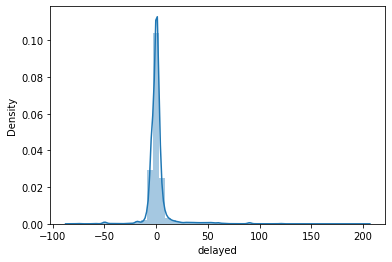

In [55]:
sns.distplot(y_train) # graph is right skewed
# outliers present but not that significant

In [56]:
X_train.merge(y_train,on = X_train.index)  #mergin x and y for verifying

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,invoice_id,isOpen,delayed
0,35730,U001,0200769623,WAL-MAR foundation,2019-01-15,2019,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,69036.50,NAH4,1.928540e+09,0,1
1,23437,U001,0200742521,GLA us,2019-01-10,2019,1.928537e+09,2018-12-30,2018-12-30,2019-01-14,29413.02,NAA8,1.928537e+09,0,-4
2,34472,U001,0200706844,WINC,2019-01-14,2019,1.928513e+09,2018-12-30,2018-12-30,2019-01-14,20651.54,NAA8,1.928513e+09,0,0
3,23422,U001,0200769623,WAL-MAR,2019-01-10,2019,1.928544e+09,2018-12-30,2018-12-30,2019-01-14,18348.59,NAH4,1.928544e+09,0,-4
4,7391,U001,0200726979,BJ'S corporation,2019-01-15,2019,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,53.25,NAA8,1.928539e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27397,2553,U001,0200148860,DOLLA corporation,2019-10-23,2019,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,42135.47,NAA8,1.929976e+09,0,0
27398,10944,U001,0200705742,DOT corp,2019-10-23,2019,1.929983e+09,2019-10-08,2019-10-08,2019-11-11,5102.28,NAAW,1.929983e+09,0,-19
27399,42264,U001,0200744019,TARG associates,2019-10-31,2019,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,350.40,NAA8,1.929987e+09,0,8
27400,37479,U001,0200769623,WAL-MAR foundation,2019-10-18,2019,1.929976e+09,2019-10-08,2019-10-08,2019-10-23,387.91,NAH4,1.929976e+09,0,-5


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 35730 to 27781
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27402 non-null  object        
 1   cust_number             27402 non-null  object        
 2   name_customer           27402 non-null  object        
 3   clear_date              27402 non-null  datetime64[ns]
 4   buisness_year           27402 non-null  int64         
 5   doc_id                  27402 non-null  float64       
 6   posting_date            27402 non-null  datetime64[ns]
 7   document_create_date.1  27402 non-null  datetime64[ns]
 8   due_in_date             27402 non-null  datetime64[ns]
 9   total_open_amount       27402 non-null  float64       
 10  cust_payment_terms      27402 non-null  object        
 11  invoice_id              27399 non-null  float64       
 12  isOpen                  27402 non-null  in

In [58]:
X_train.nunique()

business_code                 6
cust_number                1235
name_customer              3387
clear_date                  285
buisness_year                 1
doc_id                    27402
posting_date                283
document_create_date.1      283
due_in_date                 344
total_open_amount         25182
cust_payment_terms           61
invoice_id                27399
isOpen                        1
dtype: int64

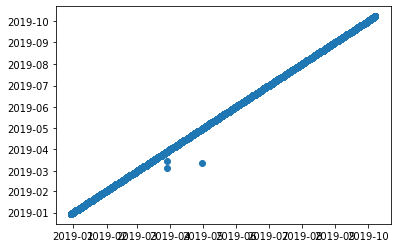

In [59]:
plt.plot_date(X_train['posting_date'],X_train['document_create_date.1']) #this shows that posting and create date are almost same y=x line

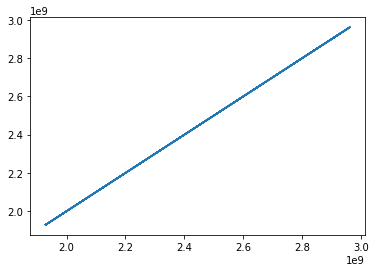

In [60]:
plt.plot(X_train['doc_id'],X_train['invoice_id'])        #invoice and doc id almost same and invoice has null values so we can drop invoice_id

In [61]:
X_train.drop(['clear_date'], axis=1, inplace = True)
X_val.drop(['clear_date'], axis=1, inplace = True)     #clear_date has to be predicted so dropping
X_test.drop(['clear_date'], axis=1, inplace = True)

In [62]:
#dropping document_create_date as it is highly correlated with posting date
X_train.drop(['document_create_date.1'], axis=1, inplace = True)
X_val.drop(['document_create_date.1'], axis=1, inplace = True)     
X_test.drop(['document_create_date.1'], axis=1, inplace = True)

In [63]:
X_train.drop(['invoice_id'], axis=1, inplace = True)
X_val.drop(['invoice_id'], axis=1, inplace = True)     #clear_date has to be predicted so dropping
X_test.drop(['invoice_id'], axis=1, inplace = True)

In [64]:
X_train.drop(['buisness_year'], axis=1, inplace = True)
X_val.drop(['buisness_year'], axis=1, inplace = True)     #clear_date has to be predicted so dropping
X_test.drop(['buisness_year'], axis=1, inplace = True)

In [65]:
X_train.shape,X_val.shape,X_test.shape

((27402, 9), (5872, 9), (5872, 9))

# 4.Feature Engineering- Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
#customer variable is mixed and in object extracting number and converting to float

X_train['cust_number'] = X_train['cust_number'].str.replace(r'[^\d.]+', '')       
X_val['cust_number'] =  X_val['cust_number'].str.replace(r'[^\d.]+', '')
X_test['cust_number'] =  X_test['cust_number'].str.replace(r'[^\d.]+', '')

In [68]:
X_train["cust_number"] = X_train["cust_number"].astype(float)
X_val["cust_number"] = X_val["cust_number"].astype(float)
X_test["cust_number"] = X_test["cust_number"].astype(float)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27402 entries, 35730 to 27781
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27402 non-null  object        
 1   cust_number         27402 non-null  float64       
 2   name_customer       27402 non-null  object        
 3   doc_id              27402 non-null  float64       
 4   posting_date        27402 non-null  datetime64[ns]
 5   due_in_date         27402 non-null  datetime64[ns]
 6   total_open_amount   27402 non-null  float64       
 7   cust_payment_terms  27402 non-null  object        
 8   isOpen              27402 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 2.1+ MB


### Label encoding of categorical variables

In [70]:
#encoding business_code
lb_make = LabelEncoder()

In [71]:
X_train['business_ecode'] = lb_make.fit_transform(X_train['business_code'])
X_val['business_ecode'] = lb_make.fit_transform(X_val['business_code'])
X_test['business_ecode'] = lb_make.fit_transform(X_test['business_code'])


In [72]:
##droppping business_code 
X_train.drop(['business_code'],inplace=True,axis=1)
X_val.drop(['business_code'],inplace=True,axis=1)
X_test.drop(['business_code'],inplace=True,axis=1)

In [73]:
#encoer for pay term
pay_enc = LabelEncoder()

In [74]:
X_train['pay_enc']=pay_enc.fit_transform(X_train['cust_payment_terms'])
X_val['pay_enc']=pay_enc.fit_transform(X_val['cust_payment_terms'])
X_test['pay_enc']=pay_enc.fit_transform(X_test['cust_payment_terms'])

In [75]:
##dropping cust payment terms
X_train.drop(['cust_payment_terms'], axis=1, inplace = True)
X_val.drop(['cust_payment_terms'], axis=1, inplace = True)
X_test.drop(['cust_payment_terms'], axis=1, inplace = True)

In [76]:
##encoding customer names
name_enc = LabelEncoder()

In [77]:
X_train['name_enc']=name_enc.fit_transform(X_train['name_customer'])
X_val['name_enc']=name_enc.fit_transform(X_val['name_customer'])
X_test['name_enc']=name_enc.fit_transform(X_test['name_customer'])


In [78]:
#dropping name_customer 
X_train.drop(['name_customer'],inplace=True,axis=1)
X_val.drop(['name_customer'],inplace=True,axis=1)
X_test.drop(['name_customer'],inplace=True,axis=1)

In [79]:
X_train.dtypes

cust_number                 float64
doc_id                      float64
posting_date         datetime64[ns]
due_in_date          datetime64[ns]
total_open_amount           float64
isOpen                        int64
business_ecode                int32
pay_enc                       int32
name_enc                      int32
dtype: object

In [80]:
#encoding of posting_date
X_train['post_year']=X_train['posting_date'].dt.year
X_val['post_year']=X_val['posting_date'].dt.year
X_test['post_year']=X_test['posting_date'].dt.year

X_train['post_month']=X_train['posting_date'].dt.month
X_val['post_month']=X_val['posting_date'].dt.month
X_test['post_month']=X_test['posting_date'].dt.month


X_train['post_day']=X_train['posting_date'].dt.day
X_val['post_day']=X_val['posting_date'].dt.day
X_test['post_day']=X_test['posting_date'].dt.day

X_train['post_wday']=X_train['posting_date'].dt.weekday
X_val['post_wday']=X_val['posting_date'].dt.weekday
X_test['post_wday']=X_test['posting_date'].dt.weekday


In [81]:
#dropping posting_date
X_train.drop('posting_date',axis=1,inplace=True)
X_val.drop('posting_date',axis=1,inplace=True)
X_test.drop('posting_date',axis=1,inplace=True)


In [82]:
#encoding of due_in_date
X_train['due_year']=X_train['due_in_date'].dt.year
X_val['due_year']=X_val['due_in_date'].dt.year
X_test['due_year']=X_test['due_in_date'].dt.year

X_train['due_month']=X_train['due_in_date'].dt.month
X_val['due_month']=X_val['due_in_date'].dt.month
X_test['due_month']=X_test['due_in_date'].dt.month


X_train['due_day']=X_train['due_in_date'].dt.day
X_val['due_day']=X_val['due_in_date'].dt.day
X_test['due_day']=X_test['due_in_date'].dt.day

X_train['due_wday']=X_train['due_in_date'].dt.weekday
X_val['due_wday']=X_val['due_in_date'].dt.weekday
X_test['due_wday']=X_test['due_in_date'].dt.weekday


In [83]:
#dropping posting_date
X_train.drop('due_in_date',axis=1,inplace=True)
X_val.drop('due_in_date',axis=1,inplace=True)
X_test.drop('due_in_date',axis=1,inplace=True)


In [84]:
X_train

,cust_number,doc_id,total_open_amount,isOpen,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday
35730,200769623.0,1.928540e+09,69036.50,0,1,31,3285,2018,12,30,6,2019,1,14,0
23437,200742521.0,1.928537e+09,29413.02,0,1,18,1203,2018,12,30,6,2019,1,14,0
34472,200706844.0,1.928513e+09,20651.54,0,1,18,3345,2018,12,30,6,2019,1,14,0
23422,200769623.0,1.928544e+09,18348.59,0,1,31,3280,2018,12,30,6,2019,1,14,0
7391,200726979.0,1.928539e+09,53.25,0,1,18,349,2018,12,30,6,2019,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,200148860.0,1.929976e+09,42135.47,0,1,18,879,2019,10,8,1,2019,10,23,2
10944,200705742.0,1.929983e+09,5102.28,0,1,19,907,2019,10,8,1,2019,11,11,0
42264,200744019.0,1.929987e+09,350.40,0,1,18,3040,2019,10,8,1,2019,10,23,2
37479,200769623.0,1.929976e+09,387.91,0,1,31,3285,2019,10,8,1,2019,10,23,2


In [85]:
X_train.corr()

,cust_number,doc_id,total_open_amount,isOpen,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday
cust_number,1.000000,-0.317754,-0.011194,NaN,-0.069839,-0.113383,0.119949,-0.008877,-0.004980,-0.005908,-0.000183,0.043902,-0.019001,0.000607,0.002643
doc_id,-0.317754,1.000000,0.188398,NaN,-0.470474,-0.513221,-0.012085,0.012193,0.014718,0.014895,-0.017501,0.003103,0.005095,-0.000251,0.021930
total_open_amount,-0.011194,0.188398,1.000000,NaN,-0.120620,-0.216031,-0.014201,0.011893,0.006422,0.018218,-0.011845,0.006601,0.001751,-0.009907,0.008869
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_ecode,-0.069839,-0.470474,-0.120620,NaN,1.000000,0.494921,-0.043243,-0.006542,-0.012645,0.009829,0.018894,-0.000287,0.021706,0.003835,-0.019742
pay_enc,-0.113383,-0.513221,-0.216031,NaN,0.494921,1.000000,0.090591,-0.011194,0.006116,0.005899,0.086626,-0.033549,0.042388,-0.008154,-0.031883
name_enc,0.119949,-0.012085,-0.014201,NaN,-0.043243,0.090591,1.000000,-0.018698,0.003885,0.001979,0.110124,0.003157,-0.009088,-0.008019,0.008374
post_year,-0.008877,0.012193,0.011893,NaN,-0.006542,-0.011194,-0.018698,1.000000,-0.173446,-0.114131,-0.021381,0.153957,0.113112,0.006863,0.086483
post_month,-0.004980,0.014718,0.006422,NaN,-0.012645,0.006116,0.003885,-0.173446,1.000000,-0.043580,0.002814,-0.026703,0.932112,0.020094,-0.030309
post_day,-0.005908,0.014895,0.018218,NaN,0.009829,0.005899,0.001979,-0.114131,-0.043580,1.000000,0.018119,-0.017421,0.070325,-0.363073,-0.006101


# 5.FEATURE SELECTION

<AxesSubplot:title={'center':'Pearson Correlation'}>

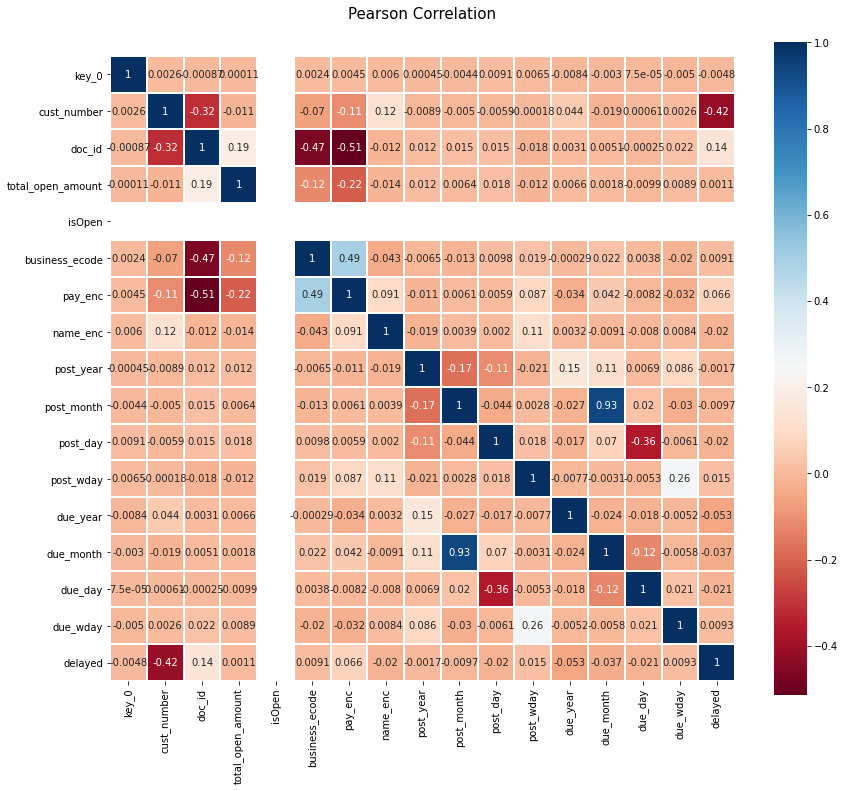

In [86]:
#plotting colormap to check the correlation
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [87]:
X_train.drop(['isOpen'],axis=1,inplace=True) #dropping as it is constant  which can be seen in heatmap
X_val.drop(['isOpen'],axis=1,inplace=True)
X_test.drop(['isOpen'],axis=1,inplace=True)

after dropping isopen

<AxesSubplot:title={'center':'Pearson Correlation'}>

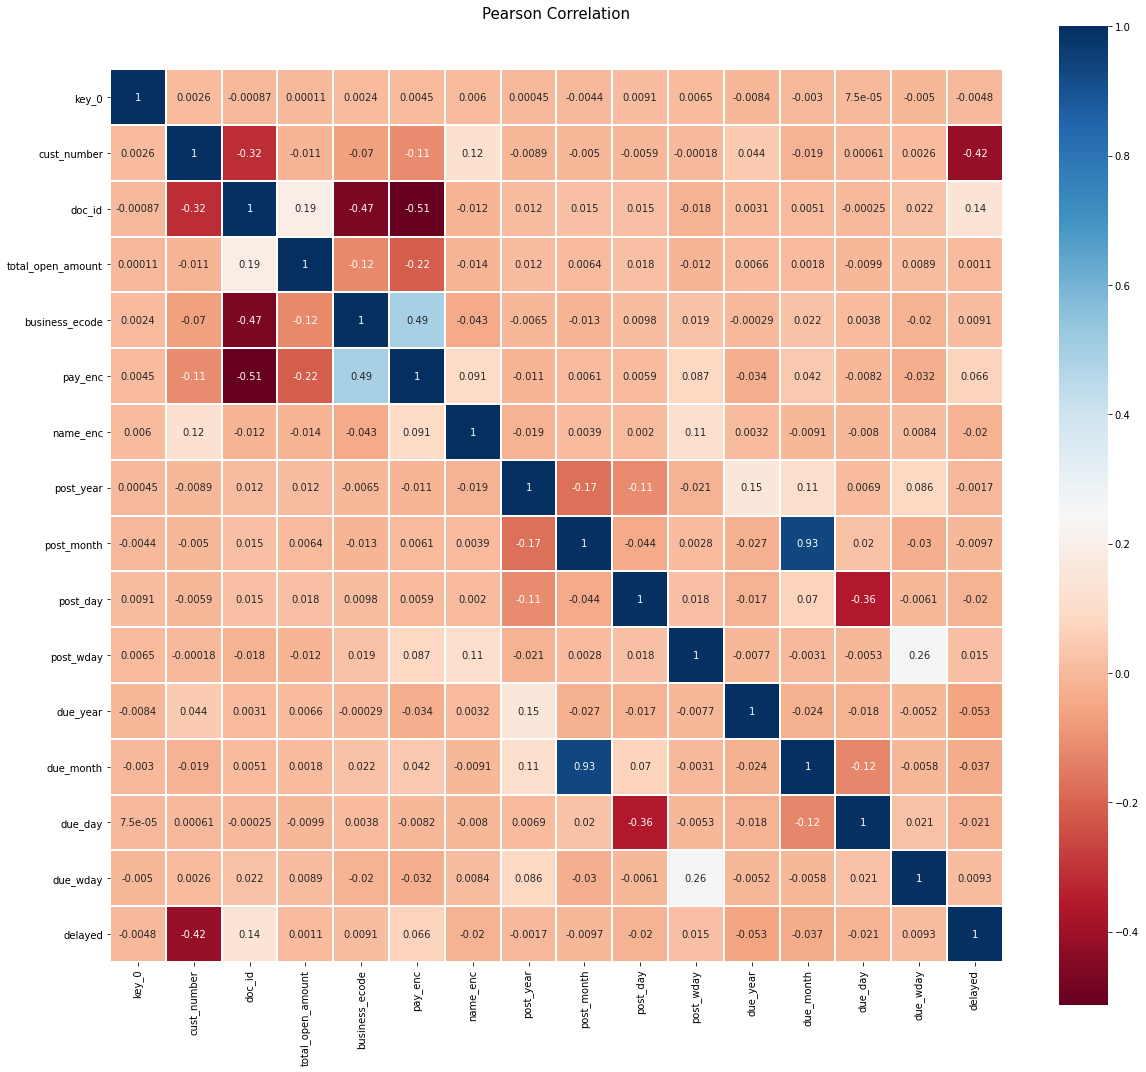

In [88]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))
plt.title('Pearson Correlation', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [89]:
# also since all the columns have been converted to int/ float , we can use variance threshold -- ;-D
#dropping constant and quasi constant

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.7)
sel.fit(X_train)

VarianceThreshold(threshold=0.7)

In [90]:
sel.variances_

array([1.91997057e+15, 8.55432784e+16, 1.57826172e+09, 3.32717546e-01,
       1.28369865e+02, 1.28146973e+06, 4.57706103e-03, 7.06137247e+00,
       7.84450814e+01, 3.27335692e+00, 1.09469074e-04, 7.16464389e+00,
       7.48173639e+01, 3.54472767e+00])

In [91]:
X_train.describe()

,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday
count,2.740200e+04,2.740200e+04,2.740200e+04,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000,27402.000000
mean,1.838381e+08,2.015268e+09,3.204288e+04,0.984162,23.673564,2054.903000,2018.995402,5.218670,15.587621,2.668929,2018.999891,5.740347,15.770236,3.070287
std,4.381827e+07,2.924832e+08,3.972807e+04,0.576827,11.330249,1132.040856,0.067655,2.657373,8.857084,1.809275,0.010463,2.676734,8.649861,1.882779
min,1.000000e+00,1.928488e+09,1.510000e+00,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,2018.000000,1.000000,1.000000,0.000000
25%,2.004308e+08,1.928997e+09,4.574875e+03,1.000000,18.000000,822.000000,2019.000000,3.000000,8.000000,1.000000,2019.000000,4.000000,8.000000,2.000000
50%,2.007599e+08,1.929428e+09,1.725608e+04,1.000000,18.000000,2326.000000,2019.000000,5.000000,16.000000,3.000000,2019.000000,6.000000,16.000000,3.000000
75%,2.007696e+08,1.929771e+09,4.654865e+04,1.000000,31.000000,3277.000000,2019.000000,7.000000,23.000000,4.000000,2019.000000,8.000000,23.000000,5.000000
max,2.009990e+08,9.500000e+09,1.011888e+06,5.000000,60.000000,3386.000000,2019.000000,12.000000,31.000000,6.000000,2019.000000,12.000000,31.000000,6.000000


# 6.Modelling

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [93]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_predict = base_model.predict(X_val)      #predicting for val set

In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict,squared=True)        #mse value-mean square value

39.5541091364511

In [96]:
mean_squared_error(y_val, y_predict,squared=False)       #rmse value-root mean square value

6.289205763564355

In [97]:
predictions1=[round(value) for value in y_predict]

In [98]:
accuracy=accuracy_score(y_val,predictions1)
print("Accuracy: %.2f%%"%(accuracy*100.0))          #accuracy

Accuracy: 3.75%


## checking with Random forest

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
clf = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth = 2)
clf.fit(X_train, y_train) #fitting the train set to create model

# Predicting the Test Set Results
predicted = clf.predict(X_val)

In [100]:
mean_squared_error(y_val, predicted,squared=True)        #mse value

53.3737023713228

In [101]:
mean_squared_error(y_val, predicted,squared=False)       #rmse value

7.305730789683042

In [102]:
predictions=[round(value) for value in predicted]

In [103]:
accuracy=accuracy_score(y_val,predictions)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 21.34%


## checking with xgboost

In [104]:
import xgboost as xgb
clf1 = xgb.XGBRegressor(n_estimators = 100, random_state = 0,max_depth = 2)
clf1.fit(X_train, y_train)

# Predicting the Test Set Results
predicted1 = clf1.predict(X_val)

In [105]:
mean_squared_error(y_val, predicted1,squared=True)  #mse value

65.79763237585718

In [106]:
mean_squared_error(y_val, predicted1,squared=False)       #rmse value

8.111573976476894

In [107]:
predictionx=[round(value) for value in predicted1]

In [108]:
accuracy=accuracy_score(y_val,predictionx)
print("Accuracy: %.2f%%"%(accuracy*100.0))

Accuracy: 4.75%


## going further with random forest getting more accuracy and no y=mx relation found during eda so not using linear regression

## Working on X_test set

In [109]:
y_predict_test = clf.predict(X_test)     #predicting delay of xtest

In [110]:
xtest_predict=pd.Series(y_predict_test,name='Pred_delay')       #converting numpy array to panda series with name pred_delay

In [111]:
xtest_predict=xtest_predict.astype('int')          #changin datatype to int of delay

In [112]:
X_test.shape,xtest_predict.shape

((5872, 14), (5872,))

In [113]:
X_test.reset_index(drop=True,inplace=True) #resetting index

In [114]:
X_test = X_test.merge(xtest_predict , on = X_test.index )
X_test

,key_0,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday,Pred_delay
0,0,200726979.0,1.930251e+09,511.53,1,12,151,2019,12,9,0,2019,12,24,1,0
1,1,200769623.0,1.930256e+09,1897.50,1,26,1441,2019,12,9,0,2019,12,24,1,0
2,2,200797452.0,1.930244e+09,47893.48,1,12,1398,2019,12,9,0,2019,12,24,1,0
3,3,200793568.0,1.930254e+09,81936.56,1,12,1252,2019,12,9,0,2019,12,24,1,0
4,4,200769623.0,1.930249e+09,21719.65,1,26,1442,2019,12,9,0,2019,12,24,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,5867,200778870.0,1.930570e+09,15226.98,1,12,188,2020,2,26,2,2020,3,12,3,0
5868,5868,200794332.0,1.930577e+09,77997.49,1,14,269,2020,2,27,3,2020,3,13,4,0
5869,5869,100031704.0,1.930580e+09,104459.83,1,12,332,2020,2,27,3,2020,3,13,4,3
5870,5870,200744707.0,1.930574e+09,39408.22,1,12,977,2020,2,27,3,2020,3,13,4,0


## predicting date of X_test set

taking column due year,due month and due day and combining them to create due date column

In [115]:
cols=["due_year","due_month","due_day"]
X_test['due_date'] = X_test[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")


In [116]:
X_test['due_date']=pd.to_datetime(X_test['due_date'])           #changin object to datetime

In [117]:
from datetime import date, timedelta

In [118]:
#addition, subtraction to time can only be done using timedelta
temp = X_test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))   
X_test['clear_date'] = X_test['due_date'] + temp

In [119]:
X_test

,key_0,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday,Pred_delay,due_date,clear_date
0,0,200726979.0,1.930251e+09,511.53,1,12,151,2019,12,9,0,2019,12,24,1,0,2019-12-24,2019-12-24
1,1,200769623.0,1.930256e+09,1897.50,1,26,1441,2019,12,9,0,2019,12,24,1,0,2019-12-24,2019-12-24
2,2,200797452.0,1.930244e+09,47893.48,1,12,1398,2019,12,9,0,2019,12,24,1,0,2019-12-24,2019-12-24
3,3,200793568.0,1.930254e+09,81936.56,1,12,1252,2019,12,9,0,2019,12,24,1,0,2019-12-24,2019-12-24
4,4,200769623.0,1.930249e+09,21719.65,1,26,1442,2019,12,9,0,2019,12,24,1,0,2019-12-24,2019-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,5867,200778870.0,1.930570e+09,15226.98,1,12,188,2020,2,26,2,2020,3,12,3,0,2020-03-12,2020-03-12
5868,5868,200794332.0,1.930577e+09,77997.49,1,14,269,2020,2,27,3,2020,3,13,4,0,2020-03-13,2020-03-13
5869,5869,100031704.0,1.930580e+09,104459.83,1,12,332,2020,2,27,3,2020,3,13,4,3,2020-03-13,2020-03-16
5870,5870,200744707.0,1.930574e+09,39408.22,1,12,977,2020,2,27,3,2020,3,13,4,0,2020-03-13,2020-03-13


# Work on main test

In [120]:
# now we will perform all preprocessing,feature engineering in main test to do the prediction

In [121]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,invoice_id,isOpen
1,U001,0200769623,WAL-MAR foundation,NaT,2020,1.930598e+09,2020-03-04,2020-03-04,2020-03-19,57691.09,NAH4,1.930598e+09,1
15,U001,0200769623,WAL-MAR co,NaT,2020,1.930779e+09,2020-04-13,2020-04-13,2020-04-28,12834.33,NAH4,1.930779e+09,1
19,U001,0200762301,C&S WH corporation,NaT,2020,1.930624e+09,2020-03-10,2020-03-10,2020-03-25,64691.18,NAC6,1.930624e+09,1
30,U001,0200793319,SHERM'S,NaT,2020,1.930723e+09,2020-04-01,2020-04-01,2020-04-16,5010.34,NAA8,1.930723e+09,1
39,U001,0200769623,WAL-MAR,NaT,2020,1.930667e+09,2020-03-19,2020-03-19,2020-04-03,10923.40,NAH4,1.930667e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49980,U001,0200769623,WAL-MAR foundation,NaT,2020,1.930800e+09,2020-04-18,2020-04-18,2020-05-03,33333.68,NAH4,1.930800e+09,1
49981,U001,0200769623,WAL-MAR co,NaT,2020,1.930684e+09,2020-03-21,2020-03-21,2020-04-05,44158.51,NAH4,1.930684e+09,1
49983,U001,0200769623,WAL-MAR us,NaT,2020,1.930759e+09,2020-04-07,2020-04-07,2020-04-22,31895.70,NAH4,1.930759e+09,1
49984,U001,0200772670,ASSOCIAT trust,NaT,2020,1.930627e+09,2020-03-09,2020-03-09,2020-03-24,20536.02,NAU5,1.930627e+09,1


In [122]:
#Preprocessing

In [123]:
test.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9703
buisness_year                0
doc_id                       0
posting_date                 0
document_create_date.1       0
due_in_date                  0
total_open_amount            0
cust_payment_terms           0
invoice_id                   0
isOpen                       0
dtype: int64

### drop clear_date column as we are going to predict that + its null

In [124]:
X_main_test = test.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
test.drop(['clear_date'], inplace =True,axis=1)

In [125]:
X_train.shape

(27402, 14)

In [126]:
X_main_test.shape

(9703, 12)

In [127]:
# we will perfomre all mapping of features to test for prediction

In [128]:
X_train.dtypes

cust_number          float64
doc_id               float64
total_open_amount    float64
business_ecode         int32
pay_enc                int32
name_enc               int32
post_year              int64
post_month             int64
post_day               int64
post_wday              int64
due_year               int64
due_month              int64
due_day                int64
due_wday               int64
dtype: object

In [129]:
X_main_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [130]:
X_main_test.drop(['document_create_date.1','invoice_id','buisness_year'], axis=1, inplace = True)


In [131]:
#mapping all features- using label encoding

In [132]:
#encoding business_code
X_main_test['business_ecode'] = lb_make.fit_transform(X_main_test['business_code'])
X_main_test.drop(['business_code'],inplace=True,axis=1)

In [133]:
#encoding payment terms
X_main_test['pay_enc']=pay_enc.fit_transform(X_main_test['cust_payment_terms'])
X_main_test.drop(['cust_payment_terms'], axis=1, inplace = True)

In [134]:
#encoding customer names
X_main_test['name_enc']=name_enc.fit_transform(X_main_test['name_customer'])
X_main_test.drop(['name_customer'],inplace=True,axis=1)

In [135]:
#encoding of posting_date
X_main_test['post_year']=X_main_test['posting_date'].dt.year
X_main_test['post_month']=X_main_test['posting_date'].dt.month
X_main_test['post_day']=X_main_test['posting_date'].dt.day
X_main_test['post_wday']=X_main_test['posting_date'].dt.weekday


X_main_test.drop('posting_date',axis=1,inplace=True)

In [136]:
#encoding of due_in_date
X_main_test['due_year']=X_main_test['due_in_date'].dt.year
X_main_test['due_month']=X_main_test['due_in_date'].dt.month
X_main_test['due_day']=X_main_test['due_in_date'].dt.day
X_main_test['due_wday']=X_main_test['due_in_date'].dt.weekday


In [137]:
X_main_test.drop('due_in_date',axis=1,inplace=True)

In [138]:
#encoding cutomer number
X_main_test['cust_number'] = X_main_test['cust_number'].str.replace(r'[^\d.]+', '')
X_main_test["cust_number"] = X_main_test["cust_number"].astype(float)

In [139]:
X_main_test.drop(['isOpen'],axis=1,inplace=True)

In [140]:
X_train.shape,X_main_test.shape

((27402, 14), (9703, 14))

In [141]:
X_train

,cust_number,doc_id,total_open_amount,business_ecode,pay_enc,name_enc,post_year,post_month,post_day,post_wday,due_year,due_month,due_day,due_wday
35730,200769623.0,1.928540e+09,69036.50,1,31,3285,2018,12,30,6,2019,1,14,0
23437,200742521.0,1.928537e+09,29413.02,1,18,1203,2018,12,30,6,2019,1,14,0
34472,200706844.0,1.928513e+09,20651.54,1,18,3345,2018,12,30,6,2019,1,14,0
23422,200769623.0,1.928544e+09,18348.59,1,31,3280,2018,12,30,6,2019,1,14,0
7391,200726979.0,1.928539e+09,53.25,1,18,349,2018,12,30,6,2019,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,200148860.0,1.929976e+09,42135.47,1,18,879,2019,10,8,1,2019,10,23,2
10944,200705742.0,1.929983e+09,5102.28,1,19,907,2019,10,8,1,2019,11,11,0
42264,200744019.0,1.929987e+09,350.40,1,18,3040,2019,10,8,1,2019,10,23,2
37479,200769623.0,1.929976e+09,387.91,1,31,3285,2019,10,8,1,2019,10,23,2


In [142]:
X_main_test.sort_values(['post_year','post_month','post_day'],inplace=True) #sorting the main test basedon posting date-encoded test set

In [143]:
test.sort_values(['posting_date'],inplace=True) #sorting the main test basedon posting date-original test set

# 7.Final Prediction!!

#### X_main_test- this is the encoded version of test set
#### test- this is the original set without encoding

In [144]:
y_main_test = clf.predict(X_main_test)      #predicting delay for X_main_test

In [145]:
y_main_test

array([ 5.26858504, -0.09456463, -0.09456463, ...,  3.38256206,
       -0.09456463, -0.09456463])

In [146]:
xmain_predict=pd.Series(y_main_test,name='Pred_delay')                #again converting numpy to pandas series

In [147]:
xmain_predict=xmain_predict.astype('int') #changing datatype

In [148]:
X_main_test.shape,xmain_predict.shape

((9703, 14), (9703,))

In [149]:
test.reset_index(drop=True,inplace=True) #resetting index of original

#### We got the predicted delay and now we merge with original test data and then add it to due_in_date to get predicted clear date

In [150]:
test = test.merge(xmain_predict , on = test.index )        
test

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,invoice_id,isOpen,Pred_delay
0,0,U001,0200726979,BJ'S trust,2020,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,882.53,NAA8,1.930574e+09,1,5
1,1,U001,0200764795,SYSCO,2020,1.930565e+09,2020-02-27,2020-02-27,2020-03-13,31799.16,NAA8,1.930565e+09,1,0
2,2,U001,0100043921,NASS corporation,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,19848.29,NAA8,1.930577e+09,1,0
3,3,U001,0200706844,WINC corp,2020,1.930575e+09,2020-02-27,2020-02-27,2020-03-13,9479.20,NAA8,1.930575e+09,1,0
4,4,U001,0200782001,GORDO foundation,2020,1.930570e+09,2020-02-27,2020-02-27,2020-03-30,53979.34,NA32,1.930570e+09,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,9698,CA02,0100027744,OMEGA AD corp,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,20550.40,CAB1,2.960634e+09,1,5
9699,9699,U001,0100026809,PRES trust,2020,1.930917e+09,2020-05-19,2020-05-19,2020-05-29,201.25,NA10,1.930917e+09,1,3
9700,9700,U001,100026809,PRES corporation,2020,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1.930916e+09,1,3
9701,9701,U001,0200756072,REINHA corporation,2020,1.930926e+09,2020-05-21,2020-05-21,2020-06-20,20.95,NAD5,1.930926e+09,1,0


# calculating predicted clear date of  test set

In [151]:
from datetime import date, timedelta  #additiong to datetime can only be done with timedelta variable

In [152]:
temp = test['Pred_delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
test['Predicted__payment_date'] = test['due_in_date'] + temp

In [153]:
test

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,invoice_id,isOpen,Pred_delay,Predicted__payment_date
0,0,U001,0200726979,BJ'S trust,2020,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,882.53,NAA8,1.930574e+09,1,5,2020-03-18
1,1,U001,0200764795,SYSCO,2020,1.930565e+09,2020-02-27,2020-02-27,2020-03-13,31799.16,NAA8,1.930565e+09,1,0,2020-03-13
2,2,U001,0100043921,NASS corporation,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,19848.29,NAA8,1.930577e+09,1,0,2020-03-13
3,3,U001,0200706844,WINC corp,2020,1.930575e+09,2020-02-27,2020-02-27,2020-03-13,9479.20,NAA8,1.930575e+09,1,0,2020-03-13
4,4,U001,0200782001,GORDO foundation,2020,1.930570e+09,2020-02-27,2020-02-27,2020-03-30,53979.34,NA32,1.930570e+09,1,5,2020-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,9698,CA02,0100027744,OMEGA AD corp,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,20550.40,CAB1,2.960634e+09,1,5,2020-05-21
9699,9699,U001,0100026809,PRES trust,2020,1.930917e+09,2020-05-19,2020-05-19,2020-05-29,201.25,NA10,1.930917e+09,1,3,2020-06-01
9700,9700,U001,100026809,PRES corporation,2020,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1.930916e+09,1,3,2020-06-01
9701,9701,U001,0200756072,REINHA corporation,2020,1.930926e+09,2020-05-21,2020-05-21,2020-06-20,20.95,NAD5,1.930926e+09,1,0,2020-06-20


In [154]:
def myFunction(x):
    if x<=15:
        return "0-15 days"
    elif x<=30:
        return "16-30 days"
    elif x<=45:
        return "31-45 days"
    elif x<=60:
        return "46-60 days"
    else:
        return"Greater than 60 days"
#function for bucketizing

In [155]:
test['Pred_delay']=test['Pred_delay'].apply(lambda x: myFunction(x))  #using apply for pred_delay column to categorize into bukets

In [156]:
test.rename(columns = {'Pred_delay':'Aging_Bucket'}, inplace = True)  #renaming column pred_delay to aging bucket

In [157]:
test

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,invoice_id,isOpen,Aging_Bucket,Predicted__payment_date
0,0,U001,0200726979,BJ'S trust,2020,1.930574e+09,2020-02-27,2020-02-27,2020-03-13,882.53,NAA8,1.930574e+09,1,0-15 days,2020-03-18
1,1,U001,0200764795,SYSCO,2020,1.930565e+09,2020-02-27,2020-02-27,2020-03-13,31799.16,NAA8,1.930565e+09,1,0-15 days,2020-03-13
2,2,U001,0100043921,NASS corporation,2020,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,19848.29,NAA8,1.930577e+09,1,0-15 days,2020-03-13
3,3,U001,0200706844,WINC corp,2020,1.930575e+09,2020-02-27,2020-02-27,2020-03-13,9479.20,NAA8,1.930575e+09,1,0-15 days,2020-03-13
4,4,U001,0200782001,GORDO foundation,2020,1.930570e+09,2020-02-27,2020-02-27,2020-03-30,53979.34,NA32,1.930570e+09,1,0-15 days,2020-04-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,9698,CA02,0100027744,OMEGA AD corp,2020,2.960634e+09,2020-05-16,2020-05-16,2020-05-16,20550.40,CAB1,2.960634e+09,1,0-15 days,2020-05-21
9699,9699,U001,0100026809,PRES trust,2020,1.930917e+09,2020-05-19,2020-05-19,2020-05-29,201.25,NA10,1.930917e+09,1,0-15 days,2020-06-01
9700,9700,U001,100026809,PRES corporation,2020,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1.930916e+09,1,0-15 days,2020-06-01
9701,9701,U001,0200756072,REINHA corporation,2020,1.930926e+09,2020-05-21,2020-05-21,2020-06-20,20.95,NAD5,1.930926e+09,1,0-15 days,2020-06-20


In [158]:
test.to_csv('Final_data.csv') #saving the file with predicted clear date to csv format

# Hence predicted the clear_date using ML model